# Programming question


In [1]:
import sklearn
print(sklearn.__version__)

1.1.3


In [2]:
from sklearn.model_selection import permutation_test_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()

In [4]:
def plot_pvalue(clf):
    score_iris, perm_scores_iris, pvalue_iris = permutation_test_score(
        clf, iris.data, iris.target, scoring="accuracy", cv=5, n_permutations=1000
    )
    fig, ax = plt.subplots()
    ax.hist(perm_scores_iris, bins=20, density=True)
    ax.axvline(score_iris, ls="--", color="r")
    score_label = f"Score on original\ndata: {score_iris:.2f}\n(p-value: {pvalue_iris:.3f})"
    ax.text(0.7, 10, score_label, fontsize=12)
    ax.set_xlabel("Accuracy score")
    _ = ax.set_ylabel("Probability density")

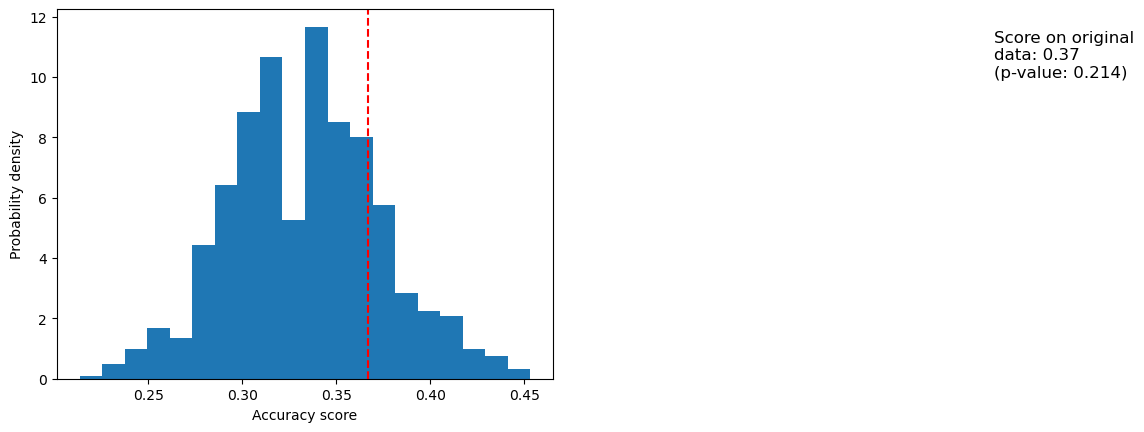

In [5]:
dummy_clf = DummyClassifier(strategy="uniform", random_state=42)
plot_pvalue(dummy_clf)

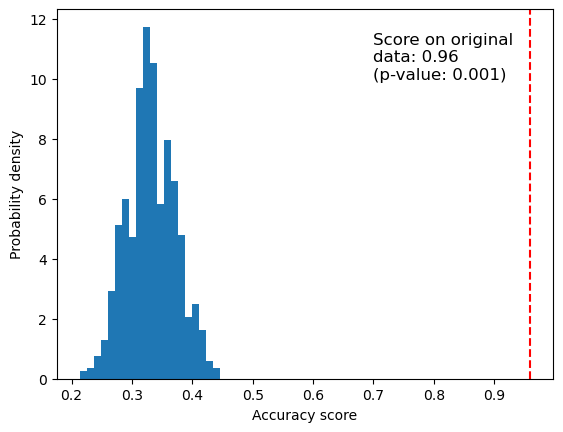

In [6]:
gbt_clf = HistGradientBoostingClassifier(max_iter=30, random_state=2)
plot_pvalue(gbt_clf)

**Conclusion**

There is a significant statistical association between the features and the target in the iris dataset, as the p-value for the gradient boosted tree estimator is very small (p-value reaches the minimal value 1/1000 for 1000 permutations and is probably even smaller). 

The gradient boosted tree is capable to assess this statistical association but not the dummy classifier (large p-value=0.214) which here generates random predictions.